In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

# 모델 구현에 필요한 데이터 셋 만들기

내 얼굴을 보고 웃고 있는가 웃고 있지 않는가를 판단하는 모델을 구현하고자 한다.


1. 웃고 있는 얼굴 이미지 여러장

/myface/train/happy/

2. 웃고 있지 않는 얼굴 이미지 여러장

/myface/train/unhappy/

3. 테스트용 웃고 있는 얼굴 + 웃고 있지 않는 얼굴 이미지 

/myface/test/happy/

/myface/test/unhappy/



# 로컬에서 이미지 데이터 불러오기

1. ImageDataGenerator 클래스를 통해 불러오기 

ImageDataGenerator는 이미지 데이터(로컬 디렉토리)를 텐서플로우(메모리)로 연결해주는 파이프라인

파이프라인을 거쳐서 이미지를 데이터 셋에게 제공할 때, 전처리 과정을 추가할 수 있도록 기능별 인자를 제공.

- reshape > 이미지의 크기를 변경하여준다.
- rescale > 255로 나누는 과정을 인자를 추가함으로써 수행할 수 있다.
- data augmentation에 필요한 전처리 과정도 제공


2. tf.keras.preprocessing.image_dataset_from_directory() 통해 불러오기


In [2]:
# 이미지 데이터(로컬 디렉토리)를 텐서플로우(메모리)로 연결해주는 파이프라인 
preprocessing = ImageDataGenerator(
    rescale = 1 / 255
)

In [5]:
# 파이프라인 -> 데이터셋

train_dataset = preprocessing.flow_from_directory(
    './dataset/myface/train/',
    target_size = (200, 200),
    batch_size = 4,
    class_mode = 'binary'
)

Found 37 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'happy': 0, 'unhappy': 1}

In [7]:
# Sequential APi로 모델을 간단히 구현
face_model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    # 이진분류를 위한 output shape, activation function -> 1, sigmoid
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
])

In [8]:
face_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [11]:
# 학습루프 
face_model.compile(
    # 다중 분류를 위한 loss => 이진 분류를 위해 BinaryCrossentropy 사용
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [13]:
face_model.fit(train_dataset, epochs = 5)

Epoch 1/5
10/10 [==============================] - 1s 82ms/step - loss: 0.6914 - accuracy: 0.5135
Epoch 2/5
10/10 [==============================] - 1s 83ms/step - loss: 0.6776 - accuracy: 0.7027
Epoch 3/5
10/10 [==============================] - 1s 82ms/step - loss: 0.6138 - accuracy: 0.7568
Epoch 4/5
10/10 [==============================] - 1s 83ms/step - loss: 0.3628 - accuracy: 0.8649
Epoch 5/5
10/10 [==============================] - 1s 80ms/step - loss: 0.1663 - accuracy: 1.0000


In [14]:
# 파이프라인 -> 데이터셋

test_dataset = preprocessing.flow_from_directory(
    './dataset/myface/test/',
    target_size = (200, 200),
    batch_size = 4,
    class_mode = 'binary'
)

Found 17 images belonging to 2 classes.


In [15]:
face_model.evaluate(test_dataset)

5/5 [==============================] - 0s 21ms/step - loss: 0.6798 - accuracy: 0.7059


[0.6797904968261719, 0.7058823704719543]

In [18]:
plt.figure(figsize = (20, 30))


#  평가 데이터에 대한 결과값 확인

os.listdir('./dataset/myface/test/happy')

['스크린샷 2021-04-14 오후 2.24.22.png',
 '스크린샷 2021-04-14 오후 2.25.42.png',
 '스크린샷 2021-04-14 오후 2.26.19.png',
 '스크린샷 2021-04-14 오후 2.27.26.png',
 '스크린샷 2021-04-14 오후 2.28.42.png',
 '스크린샷 2021-04-14 오후 2.29.09.png',
 '스크린샷 2021-04-14 오후 2.30.23.png',
 '스크린샷 2021-04-14 오후 2.31.08.png',
 '스크린샷 2021-04-14 오후 2.33.25.png']

<Figure size 1440x2160 with 0 Axes>

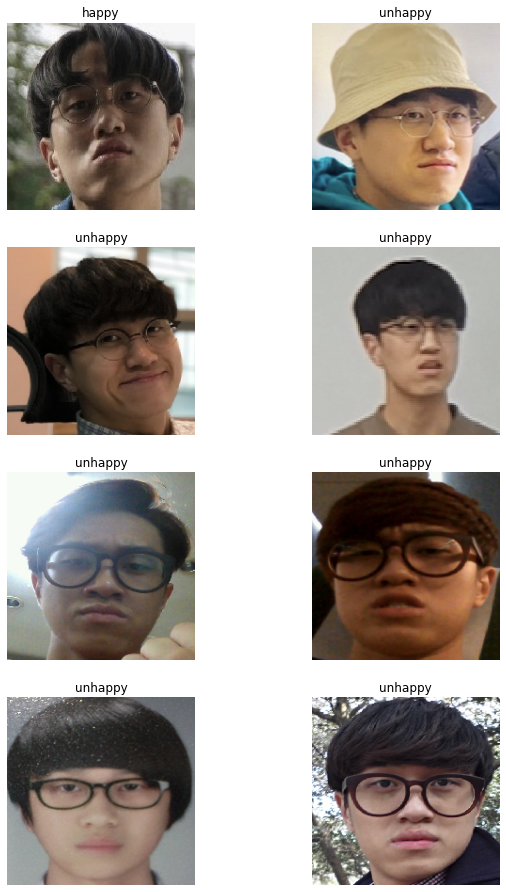

In [23]:
plt.figure(figsize = (10, 20))

for i, name in enumerate(os.listdir('./dataset/myface/test/unhappy')):
    
    # 위의 배열의 이름을 가지는 이미지 데이터를 로드
    img = tf.keras.preprocessing.image.load_img('./dataset/myface/test/unhappy/' + name, target_size = (200, 200))
    
    ax = plt.subplot(5, 2, i + 1)
    
    # image는 텐서플로우에서 제공하는 이미지 관련 기능들
    x = tf.keras.preprocessing.image.img_to_array(img)
    
    # 이미지 1개의 배열을 batch처럼 구현하기 위해 차원의 크기를 1개 추가
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    
    # 모델이 예측하는 결과값 
    result =  face_model.predict(images)[0][0]
    
    # result의 값은 0, 1의 값을 가질 것. 이진분류이기 때문에
    title  = 'happy' if result == 0 else 'unhappy'
    
    # 그림을 보여줄 때, 모델의 결과 값또한 함께 확인하기 위해
    plt.title(title)
    plt.axis('OFF')
    
    ax.imshow(img)

# CNN  기본 구현하기

## 모델 구조

convolution -> batch -> activation -> maxpooling -> fully-connected -> softmax


- input layer에서 부터 output layer까지 하위 - 상위 layer로 부른다.  
    
    또한 상위로 갈수록 layer의 결과값인 feature map의 크기는 줄어들고, channel의 수는 증가한다. 이 때, 각 layer의 feature map의 크기와 channel의 수는 우리가 조절해야하는 파라미터이다. 그렇다면 이 파라미터를 어떻게 조정하는 것이 좋을까?
    

- 각 레이어의 계산 복잡도(연산의 양)을 균일하게 하기 위하여 layer의 결과값인 feature map의 크기와 그 갯수인 channel의 수의 곱이 반드시 동일하게 유지되어야 한다.  
    
    예를 들면 layer의 출력 image의 사이즈가 2배 줄어들었다면 channel의 수는 반드시 2배로 증가해야한다. 하지만 증감에 대한 가이드만 존재할 뿐 얼마나 변경되어야하는지는 논문마다, 데이터 셋마다 다르다.   
    
    하지만 거의 대부분이 layer를 거치면서 feature map의 크기는 2배로 감소하고 channel의 수는 2배 증가한다.
    
- filter의 크기는 데이터 셋을 기반으로 선택한다.

    데이터 셋에 대한 overfitting이 발생하지 않도록 하는 적절한 수준을 찾아야한다. 
    
    
- pooling은 주로 max pooling이 사용된다. 
    
    stride가 2, filter의 크기는 2X2가 사용된다. 이 때, filter의 크기는 4이상은 정보의 손실이 과도하게 발생할 수 있기 때문에 거의 사용하지 않는다. ~~하지만 resnet에서는..~~


- down sampling을 사용할 때, 정보의 손실을 최소화한다고 하더라도 반드시 손실은 발생할 수 밖에 없다.

    fully connected layer을 사용한다고 하더라도 모든 node를 사용하는 것임에도 input - output간의 변동이 발생한다.    
    
    pooling의 과정은 down sampling의 과정을 하기 위함인데, 이 과정을 수행하지 않고 마지막 fully connected layer 대신, global average pooling을 사용하는 방법이 있다.
    
- 과적합을 방지하는 방법에는 여러가지가 있으나 우리가 할 수 있는 것들은 dropout을 사용하거나 parameter의 수를 줄이는 방법등이 있다.

    dropout은 fully connected layer의 사이에서 학습과정에서 사용되는 connected node의 수를 임의적으로 줄여 과적합을 방지한다. 모든 트레이닝 데이터에 대해서 모든 node를 사용하는 것을 방지함으로써 과적합을 방지한다.이 과정을 통해 데이터 셋에 민감하지 않은 robust한 모델을 구현하는데 새로운 데이터를 만드는 것보다 훨씬 효율적이다.


In [1]:
#이미지 확인
plt.imshow()

NameError: name 'plt' is not defined

## 데이터가 이미지가 2차원 배열임을 알 수 있다.

channel의 shape를 추가해준다. 이미지가 channel이라는 차원도 존재하기 때문에 3차원으로 만들어준다. 

1. shape는 tuple로 반환된다.
2. tuple간의 덧셈이 가능하다.
3. tuple을 선언하는 방법은 ()으로 감싸면 된다. 하지만 하나의 원소를 가질 때는 ,를 뒤에 붙여서 iterable하게 만든다.

# 단순한 CNN 구조의 모델 구현

일반적으로 각 layer의 shape에서 이미지의 높이, 너비를 나타내는 1,2번째 shape는 pooling과정에 의해 줄어든다.   
우리가 이전 과정을 통해 convolution layer의 output을 feature map이라고 하였기 때문에 feature map의 크기가 줄어든다고 할 수 있다.

- feature map의 크기가 줄어들었기 때문에 이에 맞게 filter의 갯수 또한 2배로 늘리는 작업을 수행하여 연산의 복잡도를 유지한다.

- 반복작업에 대해서는 하나의 layer를 만들어서 모델 선언영역을 최소화할 수 있다.

## compile
API로 작성된 model의 학습에 필요한 파라미터를 설정한다. 

1. adam -> 주로 사용되는 옵티마이저이다. 여러가지 옵타마이저 중에서 수렴속도가 빠른편에 속한다.
2. sparse_categorical_crossentropy -> 결과값이 integer인 경우 사용한다. 

loss function에서 각 category의 확률로 반환되는 모델의 예측값과의 차이를 계산할 때 
- integer
- one-hot encoding의 array  

인지에 따라 다르다.

categorical_crossentropy와 동일하게 다중분류 시에 사용하는 loss function이다. 
하지만 차이점은 categorical_crossentropy의 경우, 결과값이 one-hot encoding이다.



- 이미지를 확대하는 경우, 바이큐빅 보간법이나 쌍 선형 보간법을 가장 많이 사용합니다.
- 이미지를 축소하는 경우, 영역 보간법을 가장 많이 사용합니다.


## 평가

실제 손글씨에 대한 예측이 올바르게 수행되고 있는 가에 대해서 확인하고자 합니다. 전처리를 하기 위해서 OpenCV를 사용합니다. 


# 얼굴 표정을 이진 분류하는 모델

CNN을 맛보기 위해 간단한 모델 구현

- ImageDataGenerator 사용


# 데이터 준비 

###  디렉토리 구조를 통해서 데이터셋을 가져온다.

```
/basedata
    /train  
        /happy  
        /unhappy   
    /test  
        /happy  
        /unhappy
    /validation
        /happy  
        /unhappy
```

# 모델 정의

https://keras.io/api/layers/convolution_layers/convolution2d/

1. Conv2D

```python 
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

2. MaxPool2D

```python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, **kwargs
)
```


3. relu


```python
tf.keras.layers.ReLU(max_value=None, negative_slope=0, threshold=0, **kwargs)
```


4. sigmoid

```python
tf.keras.layers.Activation(tf.keras.activations.sigmoid)

```


# TFhub 를 사용한 전이학습

물체를 인식하는 데이터셋 모델을 사용해서 표정인식을 해보았다.
> 파인튜닝을 진행해보았지만 여전히 정확도가 낮았다.

> 매우 좋지 않은 모델이 탄생했다.
